In [2]:
# read the folder SR_samples
import os

SR_samples_dir = './SR_samples'
SR_samples = [f for f in os.listdir(SR_samples_dir) if os.path.isdir(os.path.join(SR_samples_dir, f))]
uxArr = []
uyArr = []
uxArr_filePaths = []
uyArr_filePaths = []
for i in range(len(SR_samples)): 
    for sample in os.listdir(os.path.join(SR_samples_dir, SR_samples[i])):
        if sample.endswith('.png'):
            data_type = sample.split('_')[-1].split('.')[1][-2:]
            fileName = sample.split('.')[:-2]
            fileName = '.'.join(fileName[:-1]) + '.' + fileName[-1].split('_')[0]  # Remove the last part after the underscore
            if data_type == 'UX':
                uxArr.append(fileName)
                uxArr_filePaths.append(os.path.join(SR_samples_dir, SR_samples[i], sample))
            elif data_type == 'UY':
                uyArr.append(fileName)
                uyArr_filePaths.append(os.path.join(SR_samples_dir, SR_samples[i], sample))

# finding original image
original_path = './image_af' 
# ux loop
def find_original(type, folderType, arr_to_check, arr_to_paths):
    originals_paths = []
    sr_sample_paths = []
    for fileName in os.listdir(os.path.join(original_path, type, folderType)):
        if fileName.endswith('.png'):
            fileName = '.'.join(fileName.split('.')[:-1])
            if fileName in arr_to_check:
                index = arr_to_check.index(fileName)
                if arr_to_paths[index] not in originals_paths:
                    sr_sample_paths.append(arr_to_paths[index])
                originals_paths.append(os.path.join(original_path, type, folderType, fileName + '.png'))  
    originals_paths.sort()
    sr_sample_paths.sort() 

    return originals_paths, sr_sample_paths

ux_originals_test, ux_sr_samples_test = find_original('ux', 'test', uxArr, uxArr_filePaths)
uy_originals_test, uy_sr_samples_test = find_original('uy', 'test', uyArr, uyArr_filePaths)
ux_originals_train, ux_sr_samples_train = find_original('ux', 'train', uxArr, uxArr_filePaths)
uy_originals_train, uy_sr_samples_train = find_original('uy', 'train', uyArr, uyArr_filePaths)

# Print the results 
print("UX Originals (Test):", ux_originals_test)
print("UX SR Samples (Test):", ux_sr_samples_test)
print("UY Originals (Test):", uy_originals_test)
print("UY SR Samples (Test):", uy_sr_samples_test)
print("UX Originals (Train):", ux_originals_train)      
print("UX SR Samples (Train):", ux_sr_samples_train)
print("UY Originals (Train):", uy_originals_train)      
print("UY SR Samples (Train):", uy_sr_samples_train)    


UX Originals (Test): ['./image_af/ux/test/airFoil2D_SST_51.101_7.597_0.458_3.077_0.0_14.85.png']
UX SR Samples (Test): ['./SR_samples/StableSR-finetuned-cfw/airFoil2D_SST_51.101_7.597_0.458_3.077_0.0_14.85_internal.vtuUX.png']
UY Originals (Test): ['./image_af/uy/test/airFoil2D_SST_58.859_13.222_0.658_5.498_17.478.png', './image_af/uy/test/airFoil2D_SST_59.921_-3.747_1.144_3.005_1.0_6.322.png', './image_af/uy/test/airFoil2D_SST_80.801_6.115_3.214_4.553_1.0_8.054.png', './image_af/uy/test/airFoil2D_SST_82.708_1.905_2.307_5.28_1.0_16.618.png']
UY SR Samples (Test): ['./SR_samples/StableSR-finetuned-cfw/airFoil2D_SST_58.859_13.222_0.658_5.498_17.478_internal.vtuUY.png', './SR_samples/StableSR-finetuned-cfw/airFoil2D_SST_59.921_-3.747_1.144_3.005_1.0_6.322_internal.vtuUY.png', './SR_samples/StableSR-finetuned-cfw/airFoil2D_SST_80.801_6.115_3.214_4.553_1.0_8.054_internal.vtuUY.png', './SR_samples/StableSR-finetuned-cfw/airFoil2D_SST_82.708_1.905_2.307_5.28_1.0_16.618_internal.vtuUY.png']
UX

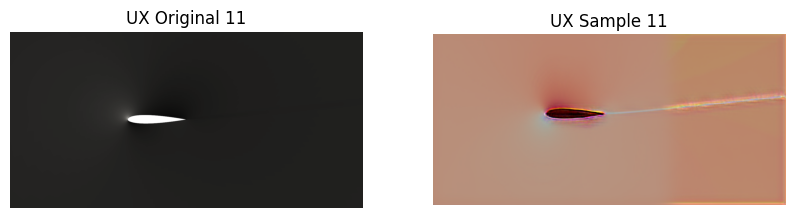

In [3]:
# compare plot originals and SR_samples 
import matplotlib.pyplot as plt
import cv2  
 
for original_path, sample_path in zip(ux_originals_test, ux_sr_samples_test): 
    ux_image = cv2.imread(original_path)
    sample_image = cv2.imread(sample_path)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(ux_image, cv2.COLOR_BGR2RGB))
    plt.title(f'UX Original {i+1}')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
    plt.title(f'UX Sample {i+1}')
    plt.axis('off')
    plt.show() 

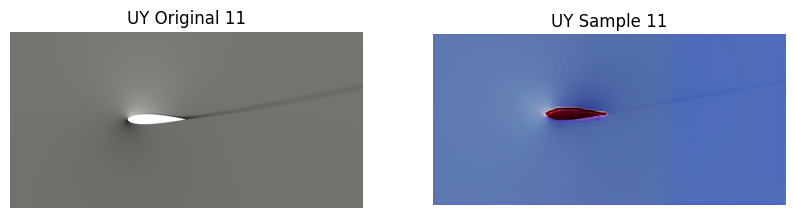

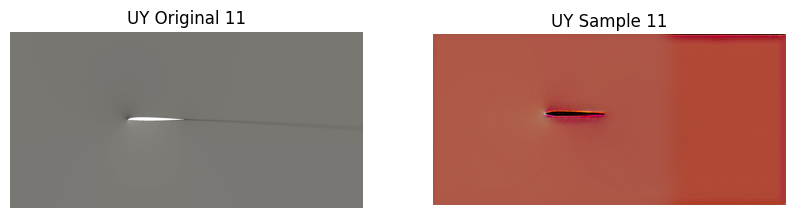

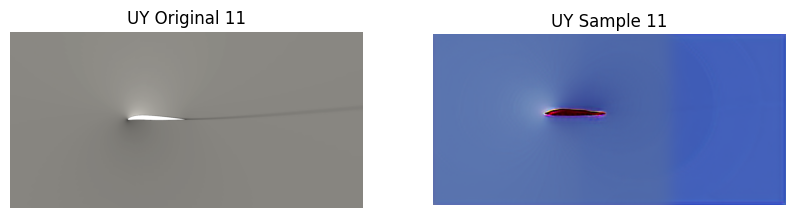

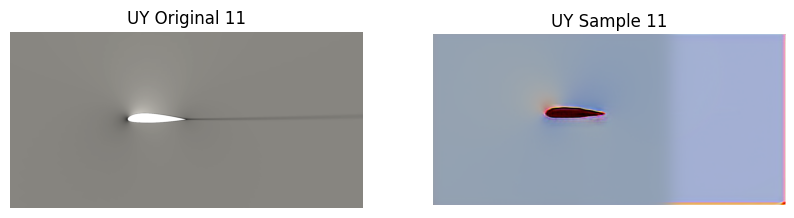

In [4]:
     
for original_path, sample_path in zip(uy_originals_test, uy_sr_samples_test): 
    uy_image = cv2.imread(original_path)
    sample_image = cv2.imread(sample_path)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(uy_image, cv2.COLOR_BGR2RGB))
    plt.title(f'UY Original {i+1}')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
    plt.title(f'UY Sample {i+1}')
    plt.axis('off')
    plt.show() 

In [5]:
from LPIPS_custom.custom_LPIPS import CustomFeatureMetric
import torch
import numpy as np

# It's more efficient to initialize the model once and reuse it.
# This global instance is a good pattern for that.
custom_lpips_model = CustomFeatureMetric(custom_vgg_path='./LPIPS_custom/vgg16_finetuned_comparitive.pth')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
custom_lpips_model.to(device)

def custom_lpips(img1, img2):
    """
    Computes the LPIPS score using the fine-tuned VGG model.
    Handles numpy array inputs and converts them to the required tensor format.
    """
    # Ensure inputs are tensors and on the correct device
    # The LPIPS model expects input Tensors in shape [B, C, H, W] and range [-1, 1]
    # The model's forward pass handles normalization from [0, 1] to [-1, 1] by default.
    if not isinstance(img1, torch.Tensor):
        img1 = torch.from_numpy(img1).permute(2, 0, 1).unsqueeze(0).float()
    
    if not isinstance(img2, torch.Tensor):
        img2 = torch.from_numpy(img2).permute(2, 0, 1).unsqueeze(0).float()

    img1 = img1.to(device)
    img2 = img2.to(device)

    with torch.no_grad(): # Disable gradient calculation for efficiency
        result = custom_lpips_model(img1, img2)

    return round(float(result.item()), 9)

# Test with properly shaped arrays
img0 = np.zeros((64, 64, 3), dtype=np.float32)  # (H, W, C) format
img1 = np.ones((64, 64, 3), dtype=np.float32)   # (H, W, C) format

distance = custom_lpips(img0, img1)
print(f"LPIPS distance with custom VGG: {distance}")

Setting up [baseline] perceptual loss: trunk [vgg], v[0.1], spatial [off]


/Users/saikirannunemunthala/Files/Lectures/Thesis/AirfranceDatasetAnalysis/.conda/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/saikirannunemunthala/Files/Lectures/Thesis/AirfranceDatasetAnalysis/.conda/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Users/saikirannunemunthala/Files/Lectures/Thesis/AirfranceDatasetAnalysis/.conda/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 a

LPIPS distance with custom VGG: 0.002923942


/Users/saikirannunemunthala/Files/Lectures/Thesis/AirfranceDatasetAnalysis/LPIPS_custom/custom_LPIPS.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.

In [6]:
import pyiqa
models = pyiqa.list_models() 
print("Available models:")
# for model in models:
#     print(model)
gmsd_metric = pyiqa.create_metric('gmsd')
print(f'GMSD: {gmsd_metric.lower_better}')
lpips_metric = pyiqa.create_metric('lpips') 
print(f'LPIPS: {lpips_metric.lower_better}')


/Users/saikirannunemunthala/Files/Lectures/Thesis/AirfranceDatasetAnalysis/.conda/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Available models:
GMSD: True
Loading pretrained model LPIPS from /Users/saikirannunemunthala/.cache/torch/hub/pyiqa/LPIPS_v0.1_alex-df73285e.pth
LPIPS: True


In [7]:
scores = []
for original_path, sample_path in zip(uy_originals_test, uy_sr_samples_test):
    # compare LPIPS, GMSD, and other metrics
    original_image = cv2.imread(original_path)
    sample_image = cv2.imread(sample_path)

    # Keep images in BGR format for LPIPS (convert to RGB)
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    sample_image_rgb = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
    
    # resize images to the same size if needed
    if original_image_rgb.shape != sample_image_rgb.shape:
        sample_image_rgb = cv2.resize(sample_image_rgb, (original_image_rgb.shape[1], original_image_rgb.shape[0]))

    # Normalize RGB images to [0, 1] for LPIPS
    original_image_rgb = original_image_rgb.astype(np.float32) / 255.0
    sample_image_rgb = sample_image_rgb.astype(np.float32) / 255.0

    c_lpips_score = custom_lpips(original_image_rgb, sample_image_rgb)
    
    # Convert RGB images to tensors for GMSD (GMSD expects RGB tensors with shape (N, 3, H, W))
    original_rgb_tensor = torch.from_numpy(original_image_rgb).permute(2, 0, 1).unsqueeze(0).float()
    sample_rgb_tensor = torch.from_numpy(sample_image_rgb).permute(2, 0, 1).unsqueeze(0).float()
    gmsd_score = gmsd_metric(original_rgb_tensor, sample_rgb_tensor)
    
    # For LPIPS metric, we need RGB format on the correct device
    original_rgb_tensor_device = original_rgb_tensor.to(device)
    sample_rgb_tensor_device = sample_rgb_tensor.to(device)
    lpips_score = lpips_metric(original_rgb_tensor_device, sample_rgb_tensor_device)

    print(f"Comparing {original_path} and {sample_path}:")
    print(f"  Custom LPIPS: {c_lpips_score}")
    print(f"  LPIPS: {lpips_score}")
    print(f"  GMSD: {gmsd_score}")
    scores.append({
        'original_path': original_path,
        'sample_path': sample_path,
        'custom_lpips_score': c_lpips_score,
        'lpips_score': lpips_score.item(),
        'gmsd_score': gmsd_score.item()
    })



Comparing ./image_af/uy/test/airFoil2D_SST_58.859_13.222_0.658_5.498_17.478.png and ./SR_samples/StableSR-finetuned-cfw/airFoil2D_SST_58.859_13.222_0.658_5.498_17.478_internal.vtuUY.png:
  Custom LPIPS: 0.000847777
  LPIPS: tensor([[0.3928]])
  GMSD: tensor([0.0788])
Comparing ./image_af/uy/test/airFoil2D_SST_59.921_-3.747_1.144_3.005_1.0_6.322.png and ./SR_samples/StableSR-finetuned-cfw/airFoil2D_SST_59.921_-3.747_1.144_3.005_1.0_6.322_internal.vtuUY.png:
  Custom LPIPS: 0.001742507
  LPIPS: tensor([[0.5244]])
  GMSD: tensor([0.1015])
Comparing ./image_af/uy/test/airFoil2D_SST_80.801_6.115_3.214_4.553_1.0_8.054.png and ./SR_samples/StableSR-finetuned-cfw/airFoil2D_SST_80.801_6.115_3.214_4.553_1.0_8.054_internal.vtuUY.png:
  Custom LPIPS: 0.001109609
  LPIPS: tensor([[0.3909]])
  GMSD: tensor([0.0764])
Comparing ./image_af/uy/test/airFoil2D_SST_82.708_1.905_2.307_5.28_1.0_16.618.png and ./SR_samples/StableSR-finetuned-cfw/airFoil2D_SST_82.708_1.905_2.307_5.28_1.0_16.618_internal.vtuUY.

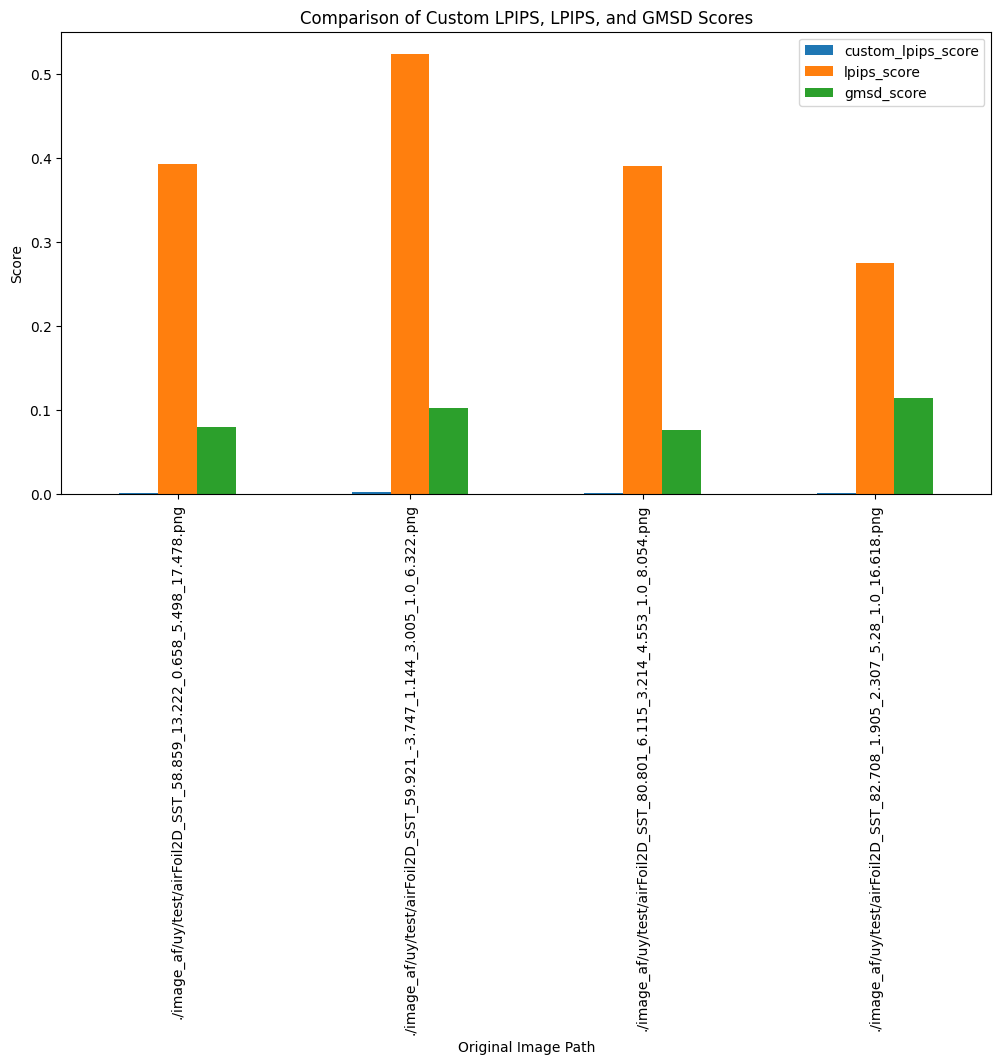

In [8]:
# plot the scores
import pandas as pd
import matplotlib.pyplot as plt
scores_df = pd.DataFrame(scores)
scores_df.set_index('original_path', inplace=True)
scores_df[['custom_lpips_score', 'lpips_score', 'gmsd_score']].plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Custom LPIPS, LPIPS, and GMSD Scores')
plt.xlabel('Original Image Path')
plt.ylabel('Score') 
plt.show()

# getting comparision image between remeshed and clipped

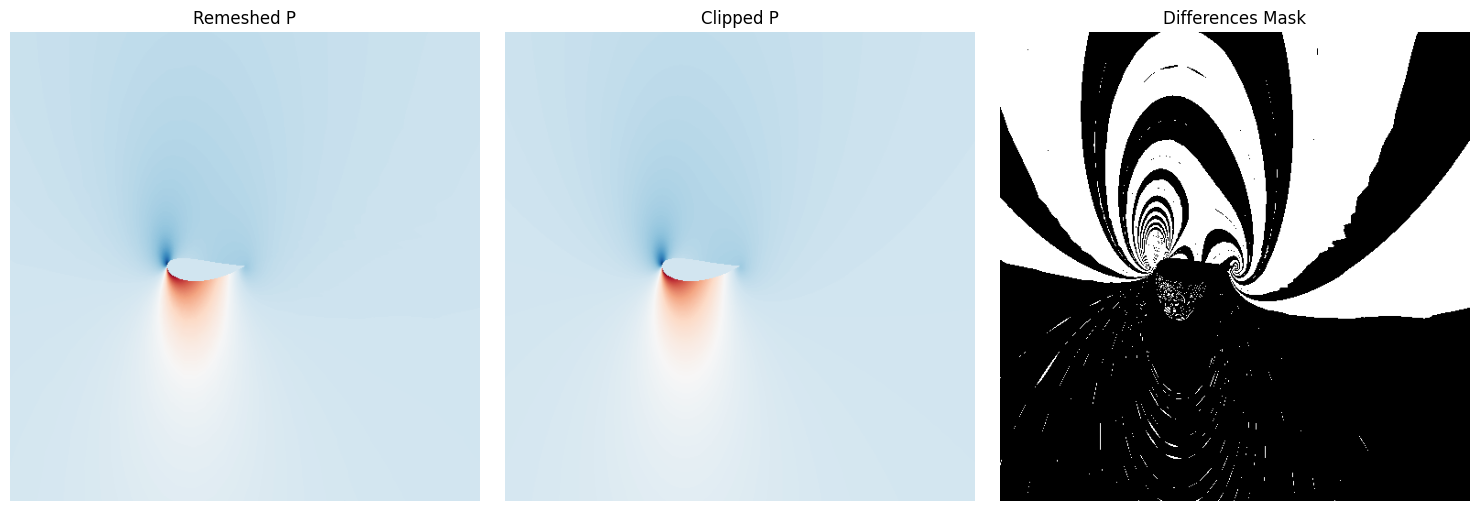

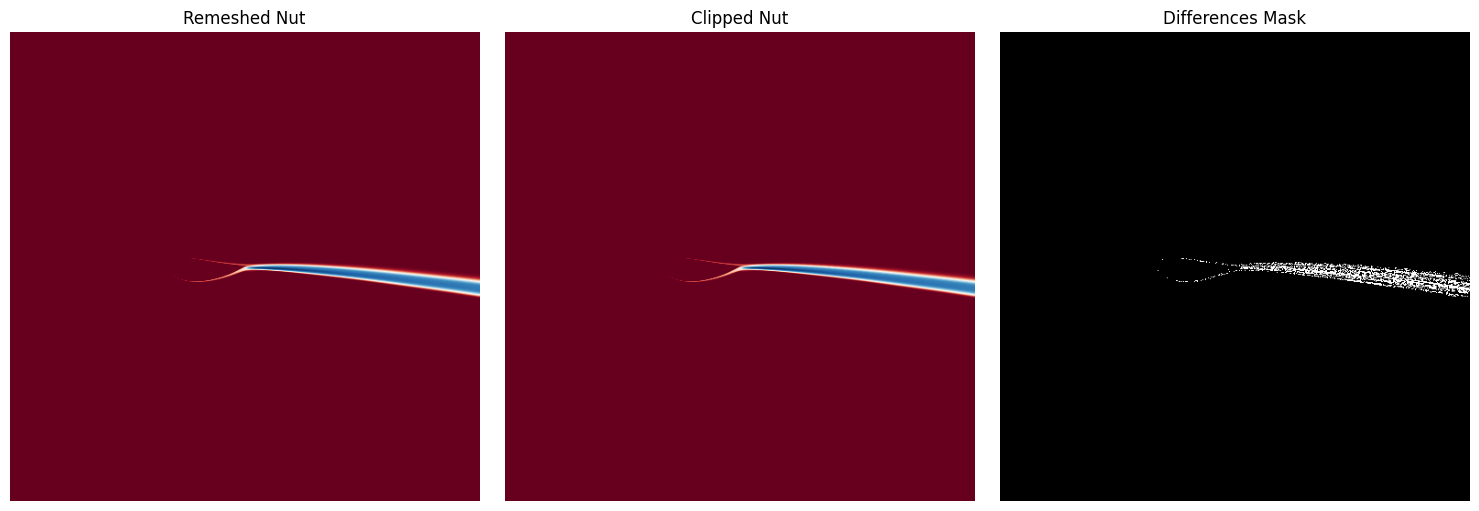

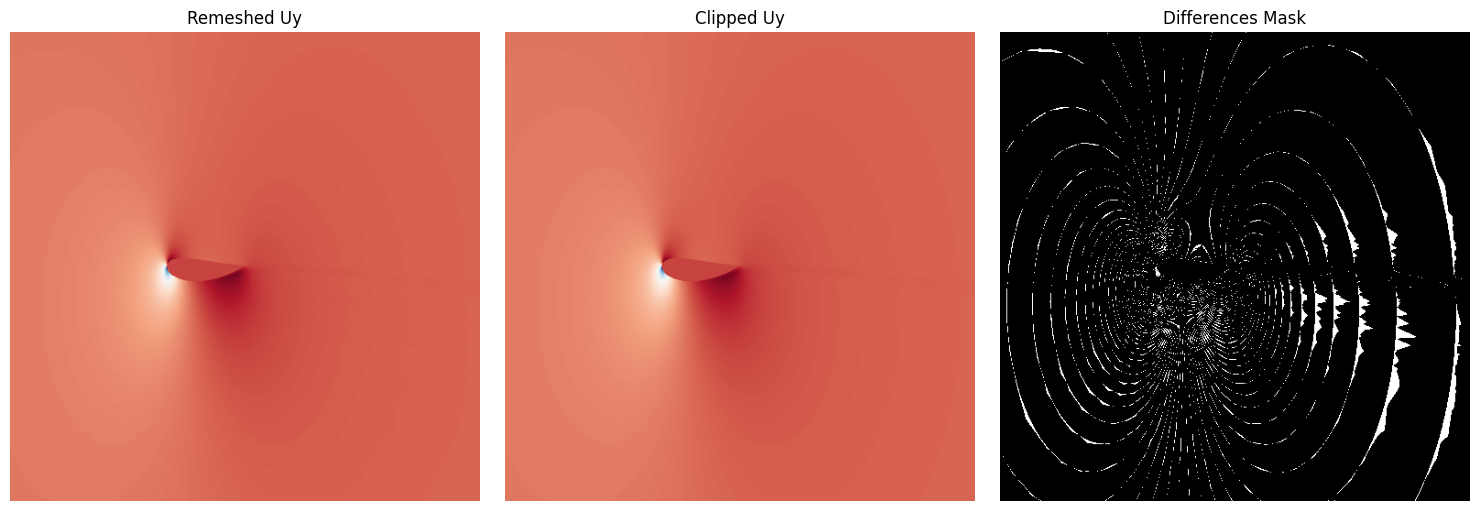

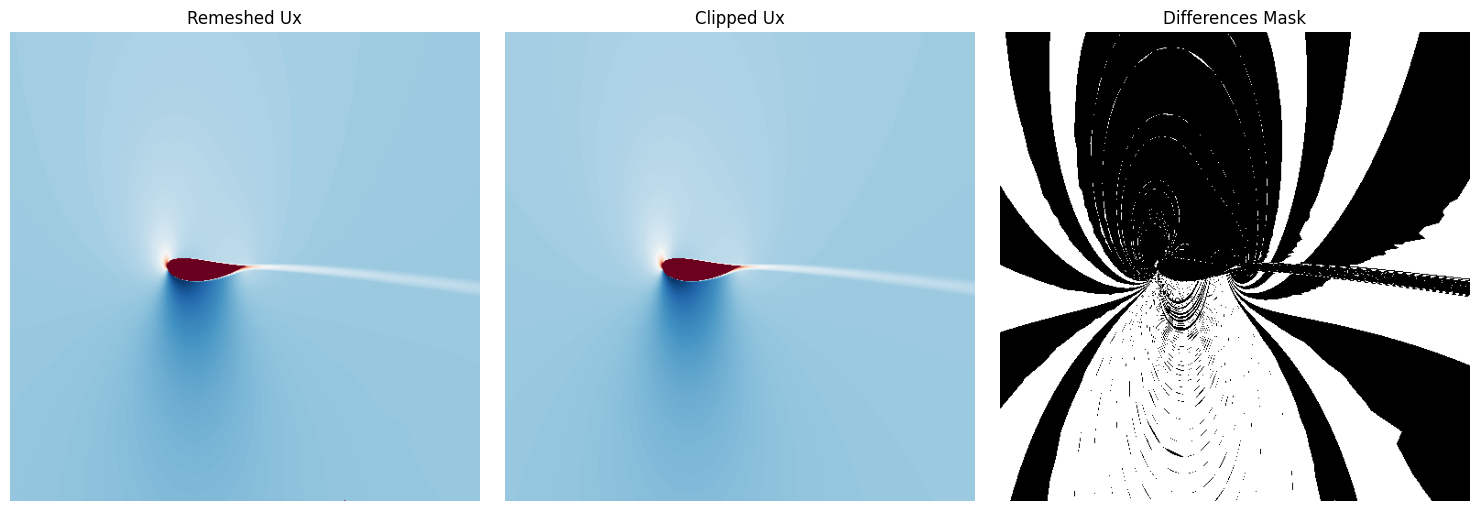

: 

In [ ]:
# get 2 images for comparision
# 1 999_remeshed_Uy.png and 999_clipped_Uy.png from path ./LPIPS_custom/raw_data_images/images
import cv2
import matplotlib.pyplot as plt
# compare zoomed images and plot only the pixel that does not match
def compare_images(image1, image2):
    """
    Compare two images and return the pixel differences.
    """
    if image1.shape != image2.shape:
        raise ValueError("Images must have the same dimensions for comparison.")
    
    # Calculate the absolute difference between the two images
    difference = cv2.absdiff(image1, image2)
    
    # Convert the difference to grayscale
    gray_difference = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
    
    # Threshold the difference to get a binary mask of differing pixels
    _, mask = cv2.threshold(gray_difference, 1, 255, cv2.THRESH_BINARY)
    
    return mask
def plot_difference(image1, image2, mask, title1="Image 1", title2="Image 2"):
    """Plot the original images and the mask of differing pixels.
    """ 
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(mask, cmap='gray')
    plt.title('Differences Mask')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# getting comparision image between remeshed and clipped
remeshed_p_image_path = './LPIPS_custom/raw_data_images/images/999_clipped_p.png'
remeshed_nut_image_path = './LPIPS_custom/raw_data_images/images/999_clipped_nut.png'
remeshed_uy_image_path = './LPIPS_custom/raw_data_images/images/999_clipped_Uy.png'
remeshed_ux_image_path = './LPIPS_custom/raw_data_images/images/999_clipped_Ux.png'

clipped_p_image_path = './LPIPS_custom/raw_data_images/images/999_remeshed_p.png'
clipped_nut_image_path = './LPIPS_custom/raw_data_images/images/999_remeshed_nut.png'
clipped_uy_image_path = './LPIPS_custom/raw_data_images/images/999_remeshed_Uy.png'
clipped_ux_image_path = './LPIPS_custom/raw_data_images/images/999_remeshed_Ux.png'

remeshed_p_image = cv2.imread(remeshed_p_image_path)
clipped_p_image = cv2.imread(clipped_p_image_path)
remeshed_nut_image = cv2.imread(remeshed_nut_image_path)
clipped_nut_image = cv2.imread(clipped_nut_image_path)
remeshed_uy_image = cv2.imread(remeshed_uy_image_path)
clipped_uy_image = cv2.imread(clipped_uy_image_path)
remeshed_ux_image = cv2.imread(remeshed_ux_image_path)
clipped_ux_image = cv2.imread(clipped_ux_image_path)

# crop at the 100pixel left to the center of the image 100 x 100 pixels
# def crop_center(image, crop_size, offset_x=80):
#     h, w = image.shape[:2]
#     start_x = w // 2 - crop_size[0] // 2 - offset_x
#     start_y = h // 2 - crop_size[1] // 2
#     return image[start_y:start_y + crop_size[1], start_x:start_x + crop_size[0]]

# remeshed_uy_image_zoomed = crop_center(remeshed_uy_image, (40, 40), offset_x=80)
# clipped_uy_image_zoomed = crop_center(clipped_uy_image, (40, 40), offset_x=80)

mask_p = compare_images(remeshed_p_image, clipped_p_image)
mask_nut = compare_images(remeshed_nut_image, clipped_nut_image)
mask_uy = compare_images(remeshed_uy_image, clipped_uy_image)
mask_ux = compare_images(remeshed_ux_image, clipped_ux_image)
# Plot the differences
plot_difference(remeshed_p_image, clipped_p_image, mask_p, title1="Remeshed P", title2="Clipped P")
plot_difference(remeshed_nut_image, clipped_nut_image, mask_nut, title1="Remeshed Nut", title2="Clipped Nut")
plot_difference(remeshed_uy_image, clipped_uy_image, mask_uy, title1="Remeshed Uy", title2="Clipped Uy")
plot_difference(remeshed_ux_image, clipped_ux_image, mask_ux, title1="Remeshed Ux", title2="Clipped Ux")


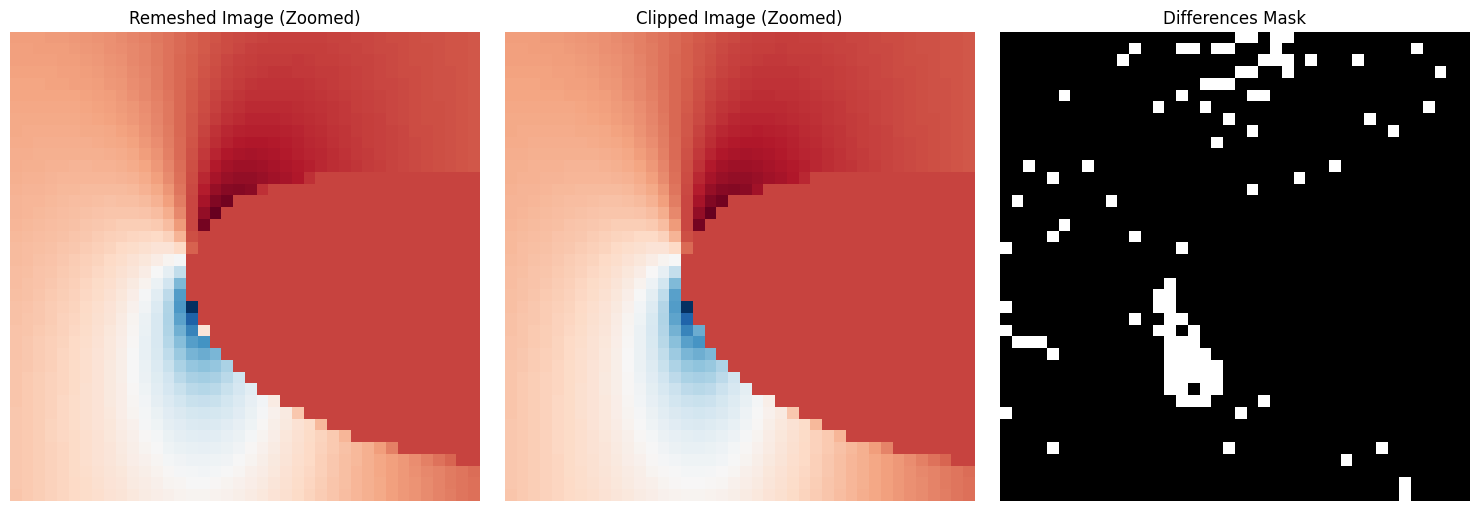

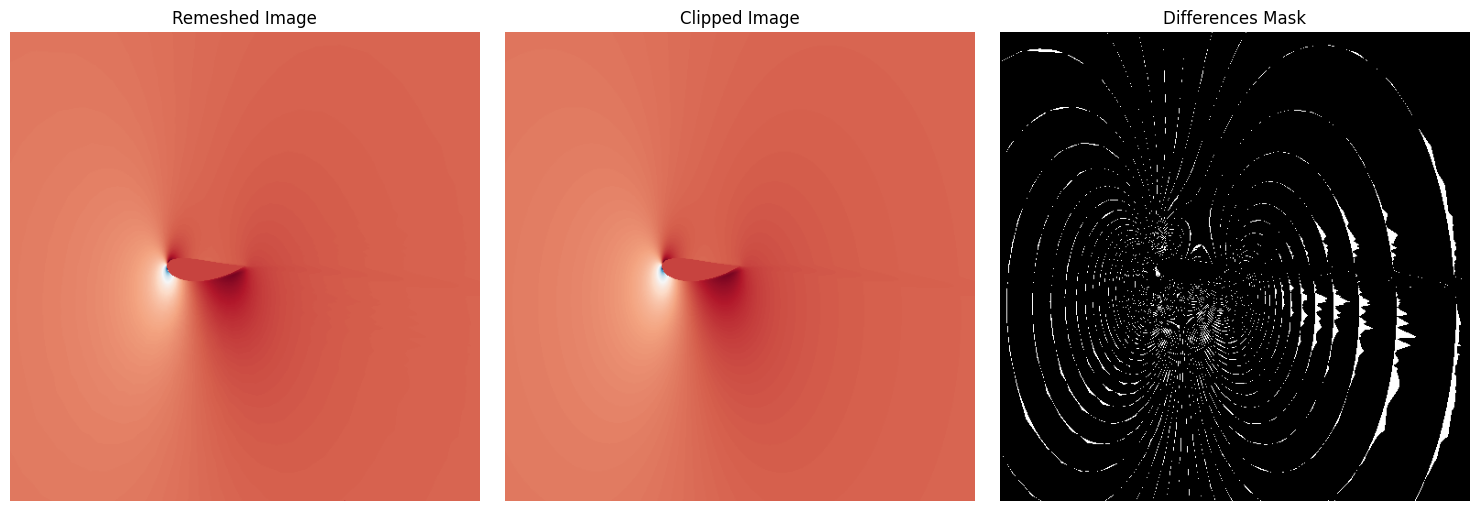

In [ ]:

mask = compare_images(remeshed_image_zoomed, clipped_image_zoomed)
plot_difference(remeshed_image_zoomed, clipped_image_zoomed, mask, "Remeshed Image (Zoomed)", "Clipped Image (Zoomed)")
full_mask = compare_images(remeshed_image, clipped_image)
plot_difference(remeshed_image, clipped_image, full_mask, "Remeshed Image", "Clipped Image")

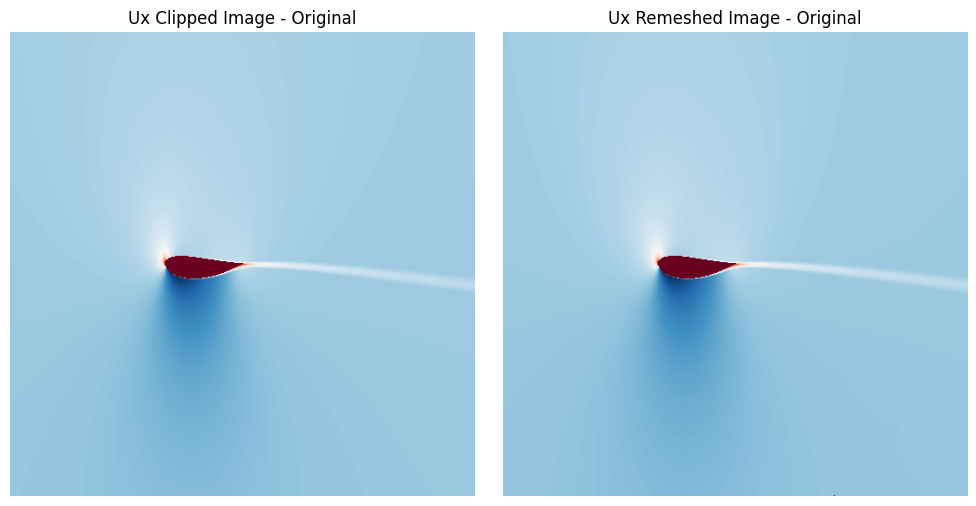

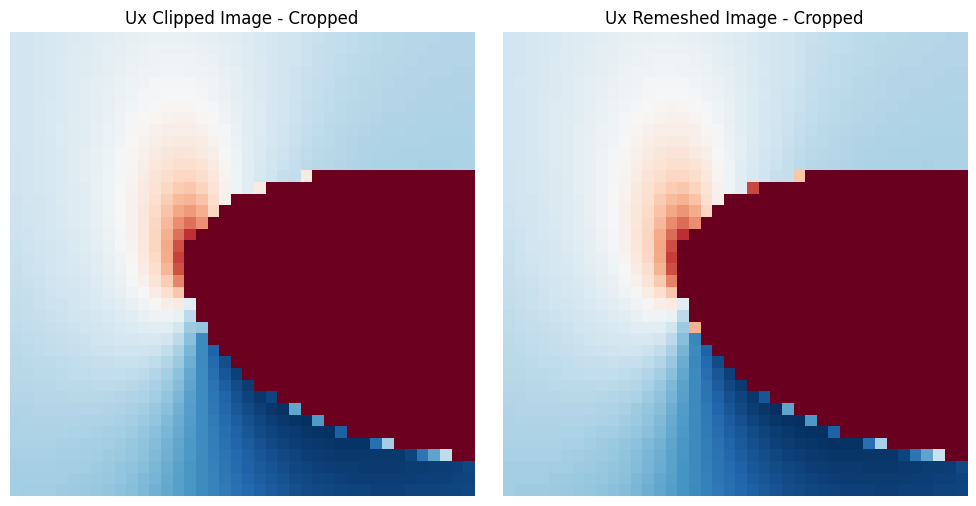

In [29]:
# get 2 images for comparision
# 1 999_remeshed_Uy.png and 999_clipped_Uy.png from path ./LPIPS_custom/raw_data_images/images
import cv2
import matplotlib.pyplot as plt

# getting comparision image between remeshed and clipped
remeshed_image_path = './LPIPS_custom/raw_data_images/images/999_clipped_Ux.png'
clipped_image_path = './LPIPS_custom/raw_data_images/images/999_remeshed_Ux.png'

remeshed_image = cv2.imread(remeshed_image_path)
clipped_image = cv2.imread(clipped_image_path)

# crop at the 100pixel left to the center of the image 100 x 100 pixels
def crop_center(image, crop_size):
    h, w = image.shape[:2]
    start_x = w // 2 - crop_size[0] // 2 - 80
    start_y = h // 2 - crop_size[1] // 2
    return image[start_y:start_y + crop_size[1], start_x:start_x + crop_size[0]]
remeshed_image_zoomed = crop_center(remeshed_image, (40, 40))
clipped_image_zoomed = crop_center(clipped_image, (40, 40))

# Displaying the original and cropped images in separate plots
plt.figure(figsize=(10, 5))

# Original images
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(remeshed_image, cv2.COLOR_BGR2RGB))
plt.title('Ux Remeshed Image - Original')
plt.axis('off')

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(clipped_image, cv2.COLOR_BGR2RGB))
plt.title('Ux Clipped Image - Original')
plt.axis('off')

plt.tight_layout()
plt.show()

# Cropped images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(remeshed_image_zoomed, cv2.COLOR_BGR2RGB))
plt.title('Ux Remeshed Image - Cropped')
plt.axis('off')

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(clipped_image_zoomed, cv2.COLOR_BGR2RGB))
plt.title('Ux Clipped Image - Cropped')
plt.axis('off')

plt.tight_layout()
plt.show()

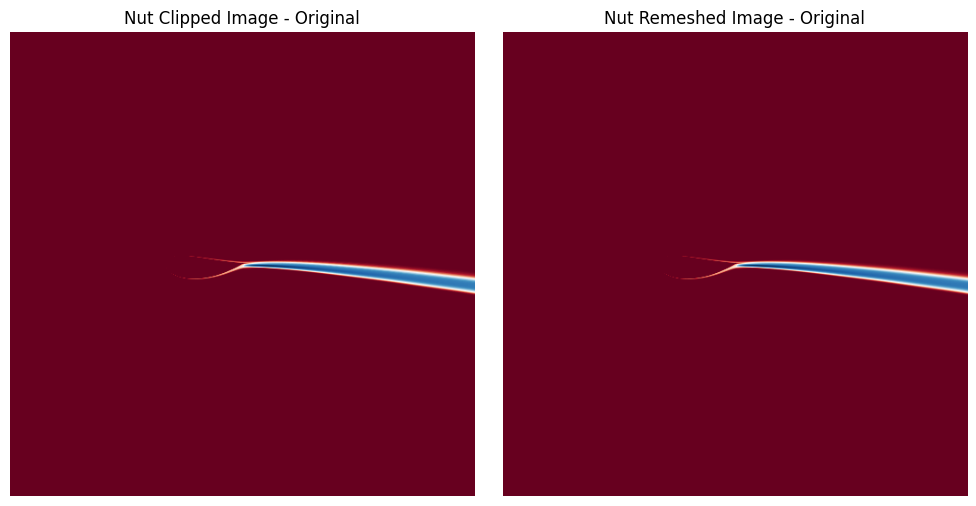

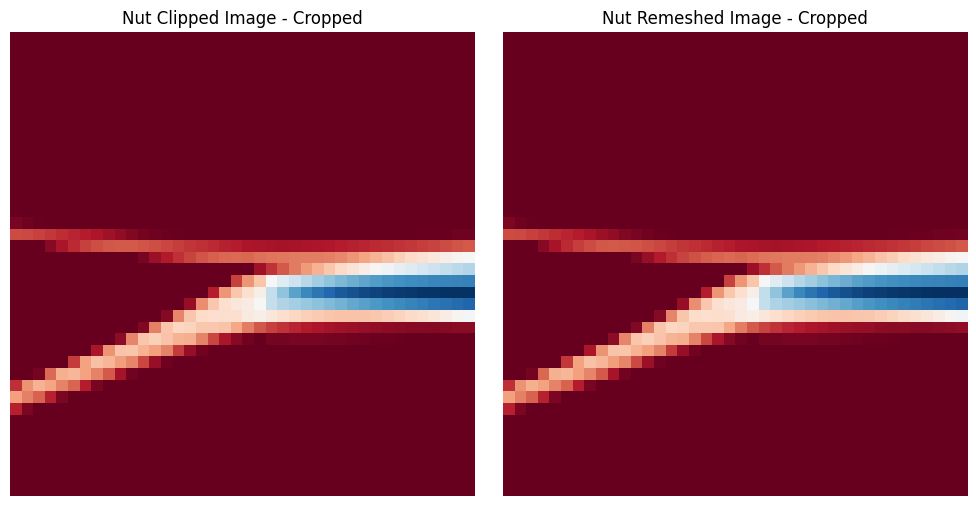

In [27]:
# get 2 images for comparision
# 1 999_remeshed_Uy.png and 999_clipped_Uy.png from path ./LPIPS_custom/raw_data_images/images
import cv2
import matplotlib.pyplot as plt

# getting comparision image between remeshed and clipped
remeshed_image_path = './LPIPS_custom/raw_data_images/images/999_clipped_nut.png'
clipped_image_path = './LPIPS_custom/raw_data_images/images/999_remeshed_nut.png'

remeshed_image = cv2.imread(remeshed_image_path)
clipped_image = cv2.imread(clipped_image_path)

# crop at the 100pixel left to the center of the image 100 x 100 pixels
def crop_center(image, crop_size):
    h, w = image.shape[:2]
    start_x = w // 2 - crop_size[0] // 2 
    start_y = h // 2 - crop_size[1] // 2
    return image[start_y:start_y + crop_size[1], start_x:start_x + crop_size[0]]
remeshed_image_zoomed = crop_center(remeshed_image, (40, 40))
clipped_image_zoomed = crop_center(clipped_image, (40, 40))

# Displaying the original and cropped images in separate plots
plt.figure(figsize=(10, 5))

# Original images
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(remeshed_image, cv2.COLOR_BGR2RGB))
plt.title('Nut Remeshed Image - Original')
plt.axis('off')

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(clipped_image, cv2.COLOR_BGR2RGB))
plt.title('Nut Clipped Image - Original')
plt.axis('off')

plt.tight_layout()
plt.show()

# Cropped images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(remeshed_image_zoomed, cv2.COLOR_BGR2RGB))
plt.title('Nut Remeshed Image - Cropped')
plt.axis('off')

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(clipped_image_zoomed, cv2.COLOR_BGR2RGB))
plt.title('Nut Clipped Image - Cropped')
plt.axis('off')

plt.tight_layout()
plt.show()

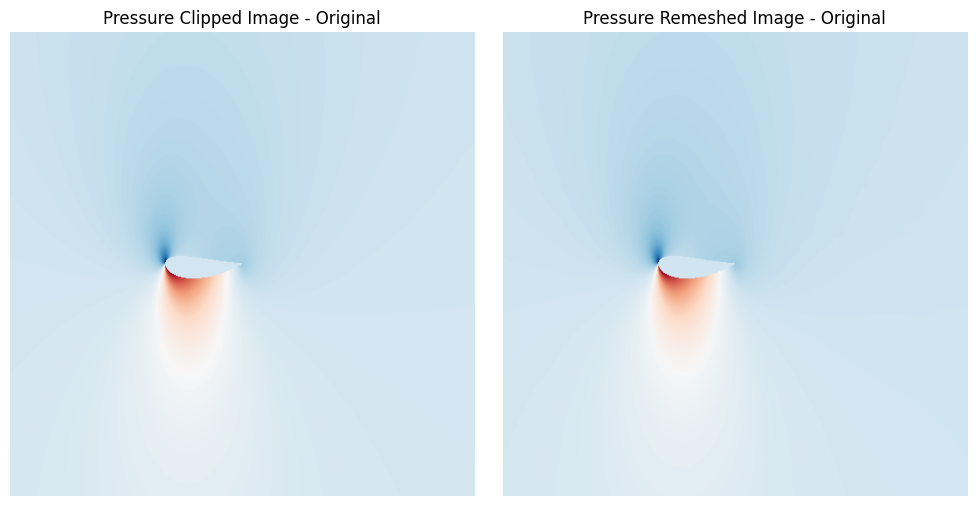

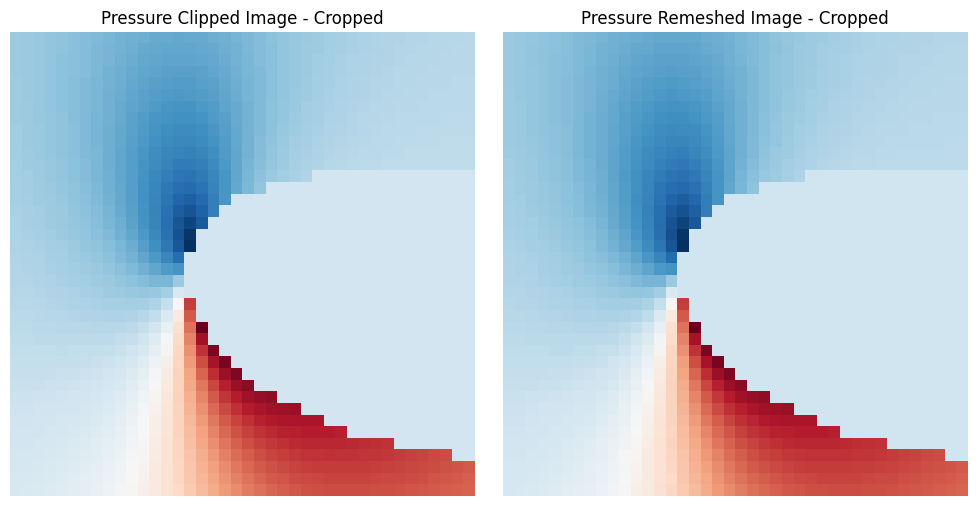

In [28]:
# get 2 images for comparision
# 1 999_remeshed_Uy.png and 999_clipped_Uy.png from path ./LPIPS_custom/raw_data_images/images
import cv2
import matplotlib.pyplot as plt

# getting comparision image between remeshed and clipped
remeshed_image_path = './LPIPS_custom/raw_data_images/images/999_clipped_p.png'
clipped_image_path = './LPIPS_custom/raw_data_images/images/999_remeshed_p.png'

remeshed_image = cv2.imread(remeshed_image_path)
clipped_image = cv2.imread(clipped_image_path)

# crop at the 100pixel left to the center of the image 100 x 100 pixels
def crop_center(image, crop_size):
    h, w = image.shape[:2]
    start_x = w // 2 - crop_size[0] // 2 - 80
    start_y = h // 2 - crop_size[1] // 2
    return image[start_y:start_y + crop_size[1], start_x:start_x + crop_size[0]]
remeshed_image_zoomed = crop_center(remeshed_image, (40, 40))
clipped_image_zoomed = crop_center(clipped_image, (40, 40))

# Displaying the original and cropped images in separate plots
plt.figure(figsize=(10, 5))

# Original images
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(remeshed_image, cv2.COLOR_BGR2RGB))
plt.title('Pressure Remeshed Image - Original')
plt.axis('off')

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(clipped_image, cv2.COLOR_BGR2RGB))
plt.title('Pressure Clipped Image - Original')
plt.axis('off')

plt.tight_layout()
plt.show()

# Cropped images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(remeshed_image_zoomed, cv2.COLOR_BGR2RGB))
plt.title('Pressure Remeshed Image - Cropped')
plt.axis('off')

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(clipped_image_zoomed, cv2.COLOR_BGR2RGB))
plt.title('Pressure Clipped Image - Cropped')
plt.axis('off')

plt.tight_layout()
plt.show()